<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_08_11_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fitter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [68]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [69]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [70]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [71]:
pd.read_csv(total_file_link[2])

,r/R,mean_delta_x,std_delta_x,mean_delta_y,std_delta_y,mean_delta_z,std_delta_z
0,0.2001,0.0434,0.0026,-0.0126,0.0013,-0.0162,0.0040
1,0.2499,-0.0157,0.0019,-0.0235,0.0031,-0.0061,0.0079
2,0.2998,-0.0418,0.0016,-0.0514,0.0053,-0.0781,0.0130
3,0.3498,-0.0550,0.0016,-0.0961,0.0091,-0.1268,0.0216
4,0.3913,-0.0646,0.0024,-0.1332,0.0133,-0.1839,0.0303
5,0.4496,-0.1020,0.0026,-0.1704,0.0173,-0.3251,0.0405
6,0.4997,-0.1255,0.0030,-0.2004,0.0207,-0.4803,0.0503
7,0.5387,-0.1535,0.0028,-0.2193,0.0230,-0.6758,0.0569
8,0.5996,-0.1964,0.0031,-0.2466,0.0273,-0.9893,0.0678
9,0.6498,-0.2235,0.0031,-0.2726,0.0316,-1.3829,0.0783


In [73]:
total_alpha_content = [ i / 1000 for i in range( 42 , 43 )  ]
total_flat_content  = [ i for i in range(1 , 5 ) ]
total_location      = list(range( 5 , 16 ))

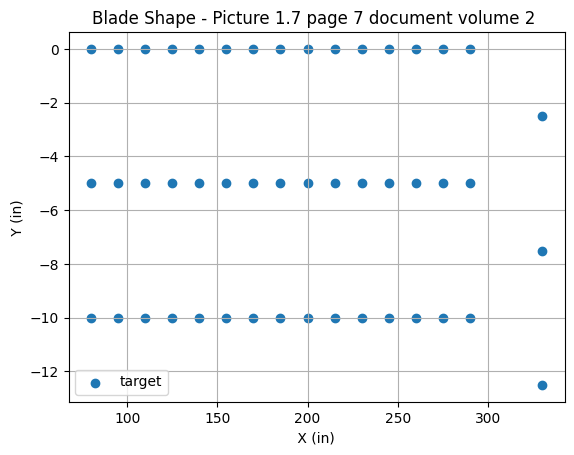

In [74]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [75]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


In [76]:
total_noew_for_generate  = []
total_noew_for_fault1    = []
total_noew_for_fault2    = []
total_noew_for_fault3    = []

In [77]:
for_each_generate_health   = []
for_each_generate_health_t = []
for_each_generate_fault    = []
for_each_generate_fault_t  = []

In [ ]:
for iter_alpha in total_alpha_content :
  iter_each_generate_health   = []
  iter_each_generate_health_t = []
  iter_each_generate_fault    = []
  iter_each_generate_fault_t  = []
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(5):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30     )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 ,  )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 ,  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} , location : {locate}")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.5 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='Fault_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)

          total_noew_for_generate.append( new_data_simulated_ )
          total_noew_for_fault1.append(new_data_simulated_health_t)
          total_noew_for_fault2.append(new_data_simulated_fault)
          total_noew_for_fault3.append(new_data_simulated_fault_t)
          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for_iter_X_health = []
          for_iter_Y_health = []
          for i in range(len(df_health['X_'])):

            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error
            for_iter_X_health.append(df_health.loc[ i , 'X_' ]  )
            for_iter_Y_health.append(df_health.loc[i , 'Y_' ])

          iter_each_generate_health.append([for_iter_X_health ,for_iter_Y_health , total_new_generate ]  )
          for_each_generate_health.append([for_iter_X_health , total_new_generate ] )
          print("r2_score in Simulation Health for Each Blade : " , r2_score(z_predict, z_test) )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          plt.figure(figsize = (10 , 10 ))

          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]


          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]
          for_iter_X_health_t = []
          for_iter_Y_health_t = []
          total_new_generate_health_t = []
          total_error_health_t = 0

          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error
            for_iter_X_health_t.append(df_health_t.loc[ i , 'X_' ])
            for_iter_Y_health_t.append(df_health_t.loc[i , 'Y_'  ])

          iter_each_generate_health_t.append([for_iter_X_health_t , for_iter_Y_health_t ,  total_new_generate_health_t ])
          for_each_generate_health_t.append([ for_iter_X_health_t , total_new_generate_health_t ])


          print("r2_score in Simulation Failt  void  for Each Blade : " , r2_score(z_predict_health_t, z_test) )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for_iter_X_fault = []
          for_iter_Y_fault = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

            for_iter_X_fault.append(df_fault.loc[ i , 'X_' ] )
            for_iter_Y_fault.append(df_fault.loc[ i , 'Y_' ] )

          iter_each_generate_fault.append([for_iter_X_fault , for_iter_Y_fault , total_new_generate_fault  ])
          for_each_generate_fault.append([ for_iter_X_fault , total_new_generate_fault])
          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- r2_score Fault S ---- " ,  r2_score(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault_t = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for_iter_X_fault_t = []
          for_iter_Y_fault_t = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault
            for_iter_X_fault_t.append(df_fault_t.loc[i , 'X_'])
            for_iter_Y_fault_t.append(df_fault_t.loc[i , 'Y_'])
          iter_each_generate_fault_t.append([for_iter_X_fault_t ,for_iter_Y_fault_t , total_new_generate_fault_t ])
          for_each_generate_fault_t.append([for_iter_X_fault_t , total_new_generate_fault_t ])
          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- r2_score Fault T : " ,  r2_score(z_predict_fault_t, z_test_fault_t)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault_t, z_test_fault_t),locate ,  3 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health_t[ : , 3 ] ,  'betha_3':params_health_t[ : , 4 ] , 'betha_4':params_health_t[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health_t[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'R2' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'R2' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.title(f"For This  alpha : {iter_alpha} and void : {iter_flat / 10 }  ")
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.3  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(classification_report(pre_nb ,y_u_test ) )
    # plt.figure(figsize = (5 ,5 ))
    # cm = confusion_matrix(pre_nb ,y_u_test , normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("Nave Bays Confusion Matrix ")
    # plt.show()
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(classification_report(pre_nb ,y_u_test ) )
    # plt.figure(figsize = (5 , 5 ))
    # cm = confusion_matrix(pre_random ,y_u_test , normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("Random Forest Confusion Matrix ")
    # plt.show()
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    # plt.figure(figsize = (5 , 5 ))
    # cm = confusion_matrix(svc_predict ,y_u_test, normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("SVM(SVC) Confusion Matrix ")
    # plt.show()
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 4 )
    new_y_u_test_cat  = to_categorical(y_u_test , 4 )

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(4 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    total_simulation['ann'].append(model_learning.evaluate(x_u_test , new_y_u_test_cat)[1])

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")




  fig = plt.figure(figsize = (12 , 8 ))
  ax1 = fig.add_subplot(1 , 4 , 1 , projection = '3d' , )
  ax2 = fig.add_subplot(1 , 4 , 2 , projection = '3d' , )
  ax3 = fig.add_subplot(1 , 4 , 3 , projection = '3d' , )
  ax4 = fig.add_subplot(1 , 4 , 4 , projection = '3d' , )


  iter_each_generate_health   = np.array(iter_each_generate_health)
  iter_each_generate_health_t = np.array(iter_each_generate_health_t)
  iter_each_generate_fault    = np.array(iter_each_generate_fault)
  iter_each_generate_fault_t  = np.array(iter_each_generate_fault_t)


  ax1.scatter3D(iter_each_generate_health[ : , 0]   , iter_each_generate_health[ : , 1] , iter_each_generate_health[ : , 2 ] , label = 'health'  , c = 'r')
  ax2.scatter3D(iter_each_generate_health_t[ : , 0] , iter_each_generate_health[: , 1] ,  iter_each_generate_health_t[ : , 2 ] , label = 'fault void' , c = 'aqua'  )
  ax3.scatter3D(iter_each_generate_fault[ : , 0]    , iter_each_generate_health[: , 1] , iter_each_generate_fault[ : , 2 ] , label = 'fault alpha ' , c='b' )
  ax4.scatter3D(iter_each_generate_fault_t[ : , 0]  , iter_each_generate_health[: , 1 ] , iter_each_generate_fault_t[ : , 2 ] , label = 'fault alpha + void ' , c='g'  )

  ax1.grid()
  ax1.set_title(" health data ")

  ax2.grid()
  ax2.set_title("fault void ")

  ax3.grid()
  ax3.set_title("fault alpha ")

  ax4.grid()
  ax4.set_title("alpha + void ")

  plt.show()

  fig1 = plt.figure(figsize = (12 , 8 ))

  ax5 = fig1.add_subplot(4 , 4 , 1   )
  ax6 = fig1.add_subplot(4 , 4 , 2   )
  ax7 = fig1.add_subplot(4 , 4 , 3   )
  ax8 = fig1.add_subplot(4 , 4 , 4   )

  ax5.scatter(iter_each_generate_health[ : , 0] , iter_each_generate_health[ : , 2 ] , label = 'health' , c='r' )
  ax6.scatter(iter_each_generate_health_t[ : , 0] , iter_each_generate_health_t[ : , 2 ] , label = 'fault void' , c='aqua' )
  ax7.scatter(iter_each_generate_fault[ : , 0] , iter_each_generate_fault[ : , 2 ] , label = 'fault alpha' , c='b')
  ax8.scatter(iter_each_generate_fault_t[ : , 0] , iter_each_generate_fault_t[ : , 2 ] , label = 'fault alpha + void' , c='g' )

  ax5.set_title("health data ")
  ax5.grid()

  ax6.set_title("fault void ")
  ax6.grid()

  ax7.set_title(f"fault alpha alpha : {iter_alpha}")
  ax7.grid()

  ax8.set_title(f"fault alpha  + void : {iter_alpha} ")
  ax8.grid()


  plt.show()




iter_alpha : 0.042 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9737120574079945
r2_score in Simulation Failt  void  for Each Blade :  0.9655081247943196
Error in Simulation Fault for Each Blade :  -0.9966561488490564  --- r2_score Fault S ----  0.9719445564924681
Error in Simulation Fault T  for Each Blade :  -0.9966561488490564  --- r2_score Fault T :  0.9874008347070335
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9796940406474101
r2_score in Simulation Failt  void  for Each Blade :  0.9788926369147143
Error in Simulation Fault for Each Blade :  -0.7592367965073021  --- r2_score Fault S ----  0.9862031560630306
Error in Simulation Fault T  for Each Blade :  -0.7592367965073021  --- r2_score Fault T :  0.9796465617508264
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9876435986124809
r2_score in Simulation Failt  void  for Each Blade :  0.9716340247666454
Error in Simulation Fa

<ipython-input-78-cc6b7e2e85dd>:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10 , 10 ))


r2_score in Simulation Failt  void  for Each Blade :  0.973533536065593
Error in Simulation Fault for Each Blade :  -1.7053271334033313  --- r2_score Fault S ----  0.9583638643807861
Error in Simulation Fault T  for Each Blade :  -1.7053271334033313  --- r2_score Fault T :  0.9723656477537099
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9662114257503465
r2_score in Simulation Failt  void  for Each Blade :  0.9766446193349969
Error in Simulation Fault for Each Blade :  -0.9088573801876796  --- r2_score Fault S ----  0.9799675223965987
Error in Simulation Fault T  for Each Blade :  -0.9088573801876796  --- r2_score Fault T :  0.9851690525434069
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9747046239986263
r2_score in Simulation Failt  void  for Each Blade :  0.9771874175266109
Error in Simulation Fault for Each Blade :  -0.24431756144598737  --- r2_score Fault S ----  0.977558828202064
Error in Simula

In [ ]:
import seaborn as sns

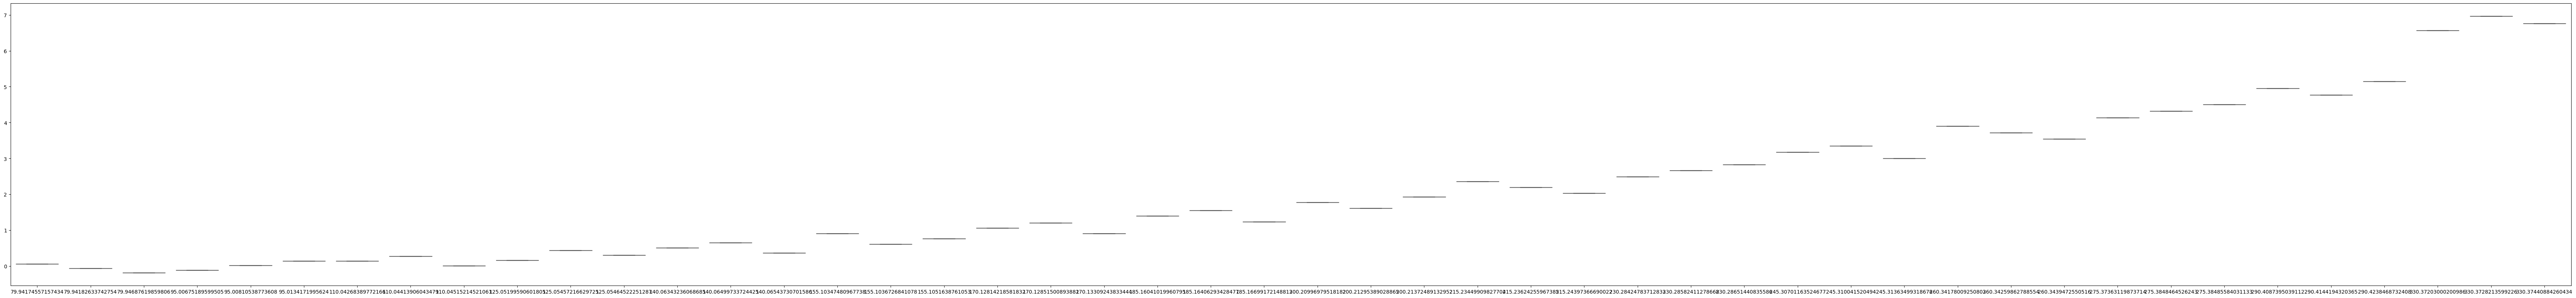

In [ ]:
plt.figure(figsize = (90 , 10 ))
sns.boxplot(x = for_each_generate_health[0][0] , y = for_each_generate_health[0][1]  )
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

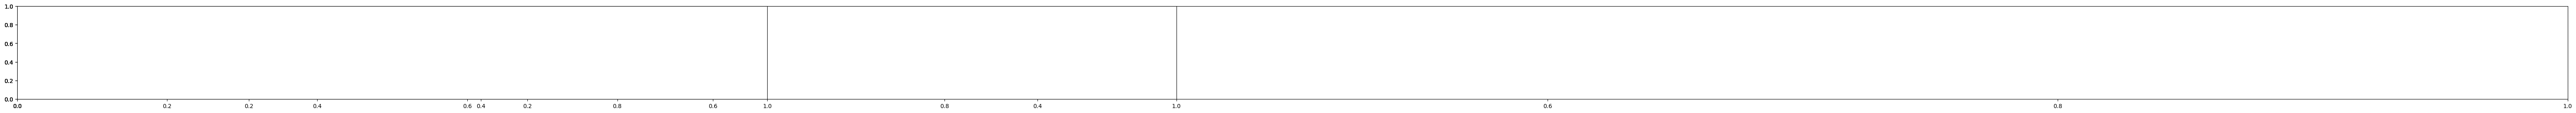

In [50]:
fig = plt.figure(figsize = (80 , 10 ))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(321)
ax3 = fig.add_subplot(331)
for el in for_each_generate_health :
  ax1 = sns.boxplot(el[0] , el[1]  )
for e2 in for_each_generate_health_t :
  ax2 = sns.boxplot(e2[0] , e2[1] )
for e3 in for_each_generate_fault :
  ax3 = sns.boxplot(e2[0] , e2[1]  )
plt.grid()
plt.show()



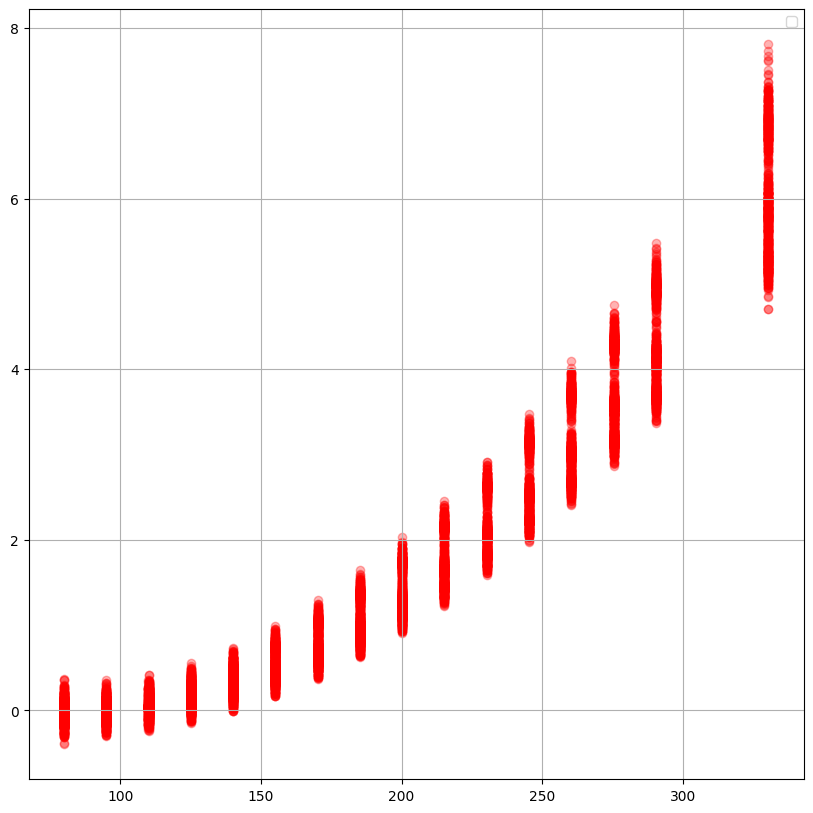

In [51]:
plt.figure(figsize = (10 , 10 ))
for el in for_each_generate_health   :
  ax1 = plt.scatter(el[0] , el[1] , c = 'r' , alpha = 0.3 )
for el in for_each_generate_health_t :
  ax2 = plt.scatter(el[0] , el[1] , c = 'r' , alpha = 0.3 )
plt.legend()
plt.grid()
plt.show()






In [ ]:
df_health.loc[1 , 'X_']

79.95330971745922

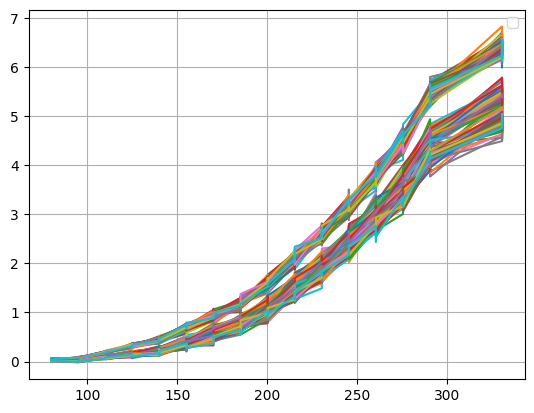

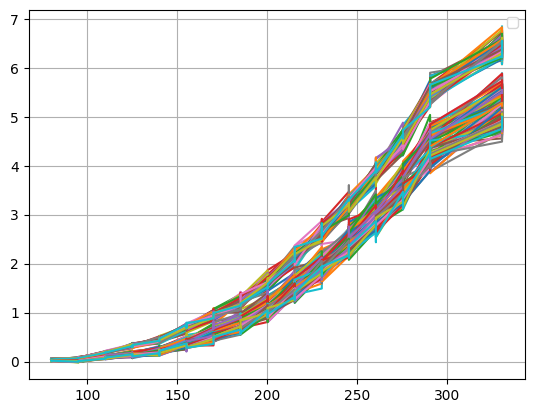

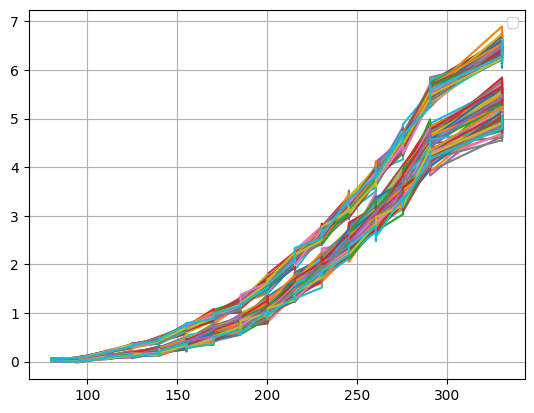

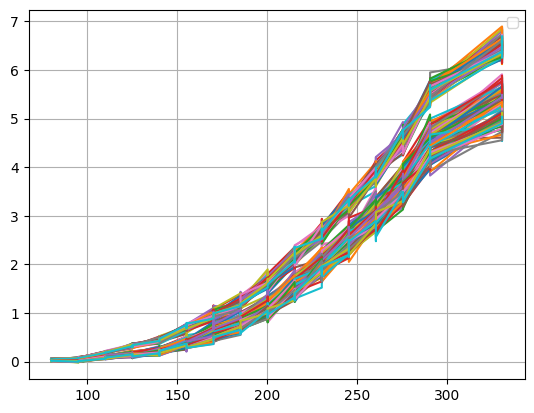

In [52]:
for index , element in enumerate(total_noew_for_generate) :
  plt.plot(element[ : , 0 ] , element[: , 2 ]     )
plt.grid()
plt.legend()
plt.show()

for index , element1 in enumerate(total_noew_for_fault1) :
  plt.plot(element1[ : , 0 ] , element1[: , 2 ]     )
plt.grid()
plt.legend()
plt.show()

for index , element2 in enumerate(total_noew_for_fault2) :
  plt.plot(element2[ : , 0 ] , element2[: , 2 ]     )
plt.grid()
plt.legend()
plt.show()

for index , element3 in enumerate(total_noew_for_fault3) :
  plt.plot(element3[ : , 0 ] , element3[: , 2 ]     )
plt.grid()
plt.legend()
plt.show()

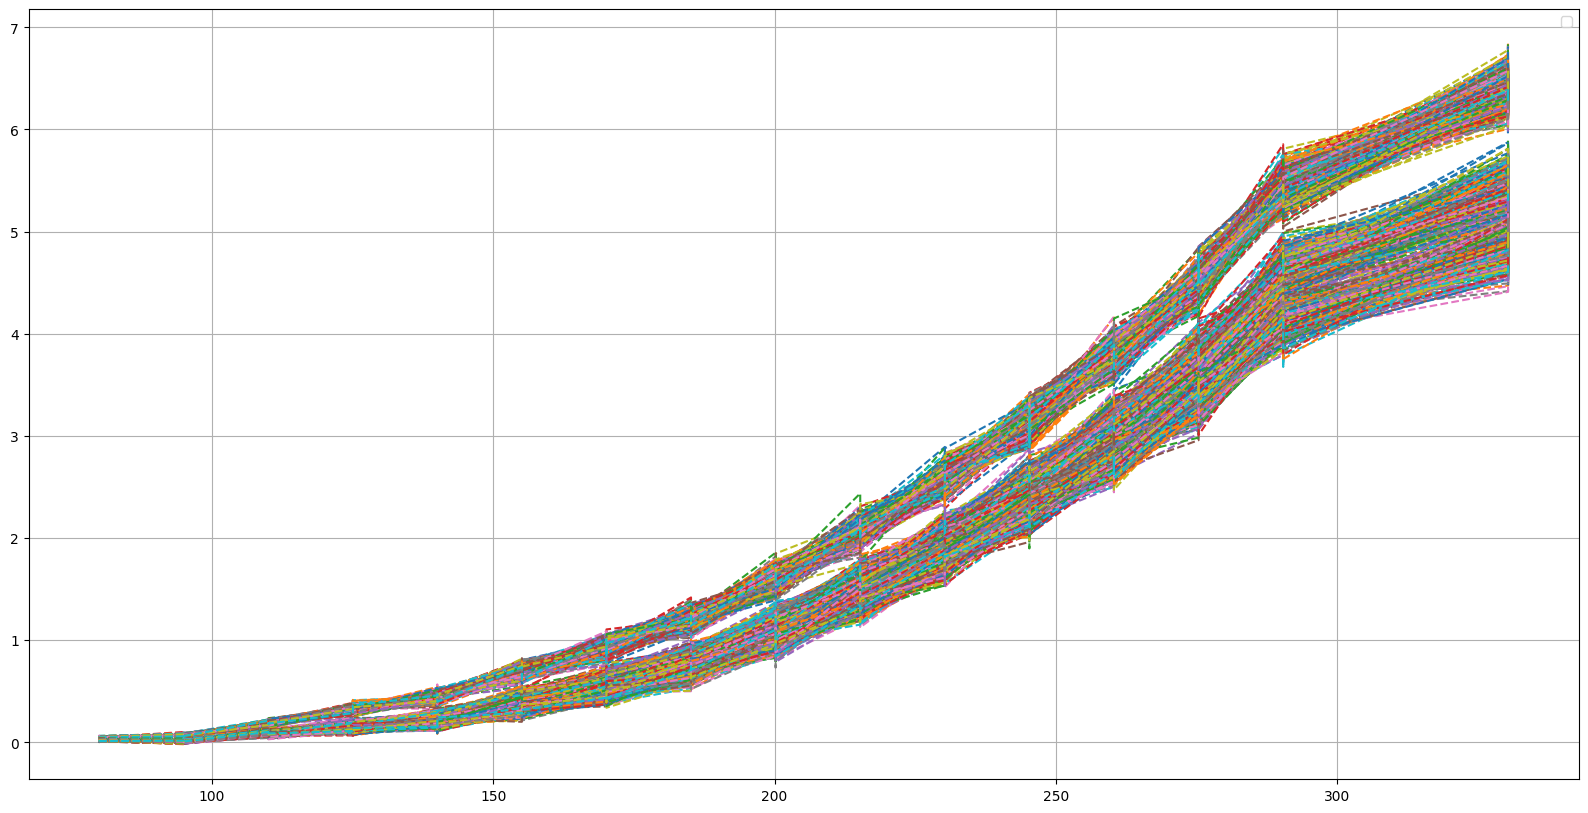

In [ ]:

fig = plt.figure(figsize=(20 , 10 ))

ax = fig.add_subplot(1 , 1, 1 )
for index , element in enumerate(total_noew_for_generate) :
  ax = plt.plot(element[ : , 0 ] , element[: , 2 ]    , ls='--' )

plt.grid()
plt.legend()
plt.show()





In [ ]:
wbapath_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH   = '/content/MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH.csv'
path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = '/content/MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T.csv'
path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T  = '/content/MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T.csv'
path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT    = '/content/MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT.csv'
path_def_result = '/content/def_result.csv'


In [ ]:

df_health_mean_and_std    = pd.read_csv(path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.read_csv(path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std   = pd.read_csv(path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std     = pd.read_csv(path_MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)
df_result                 = pd.read_csv(path_def_result)

In [ ]:

# df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
# df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
# df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
# df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [ ]:
df_fault_t_mean_and_std.shape

(36, 14)

In [ ]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


mean fault t :  1.754844873421685  - mean fault :  1.7548064240200836  - mean health :  1.7451545844051404


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

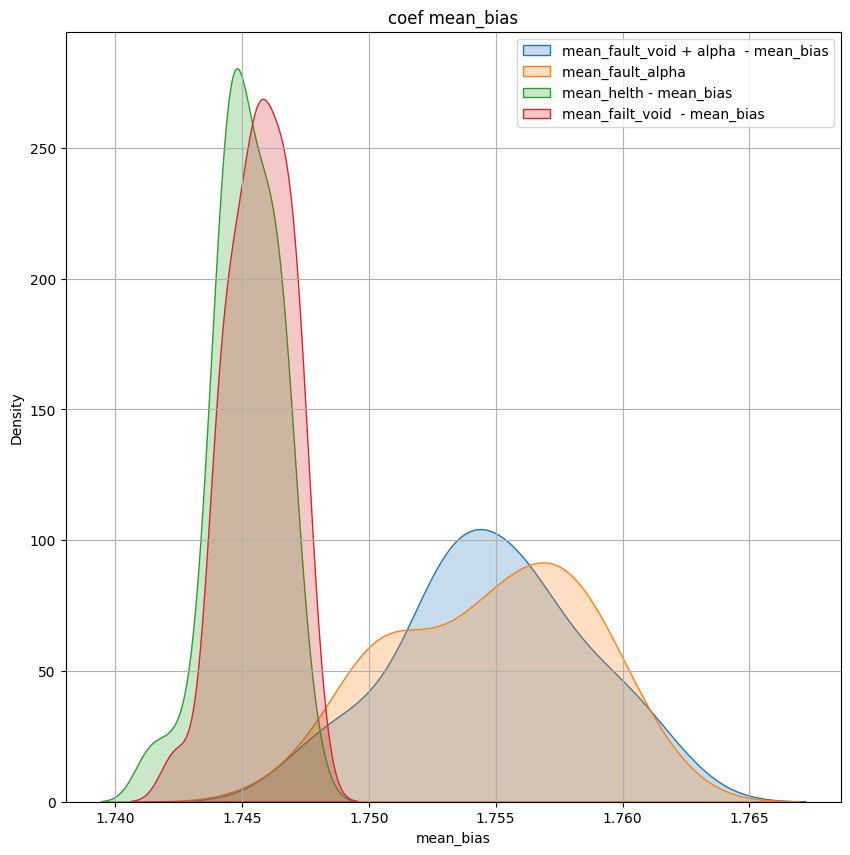

<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


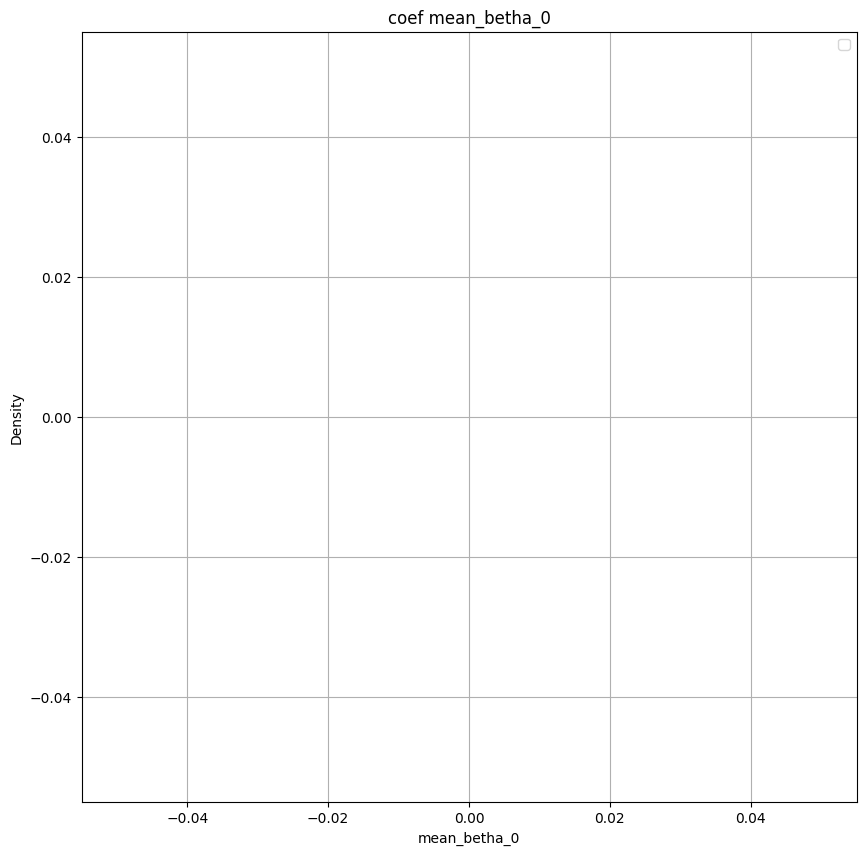

mean fault t :  -1.063743062929285  - mean fault :  -1.063545982416633  - mean health :  -1.055338527390838


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

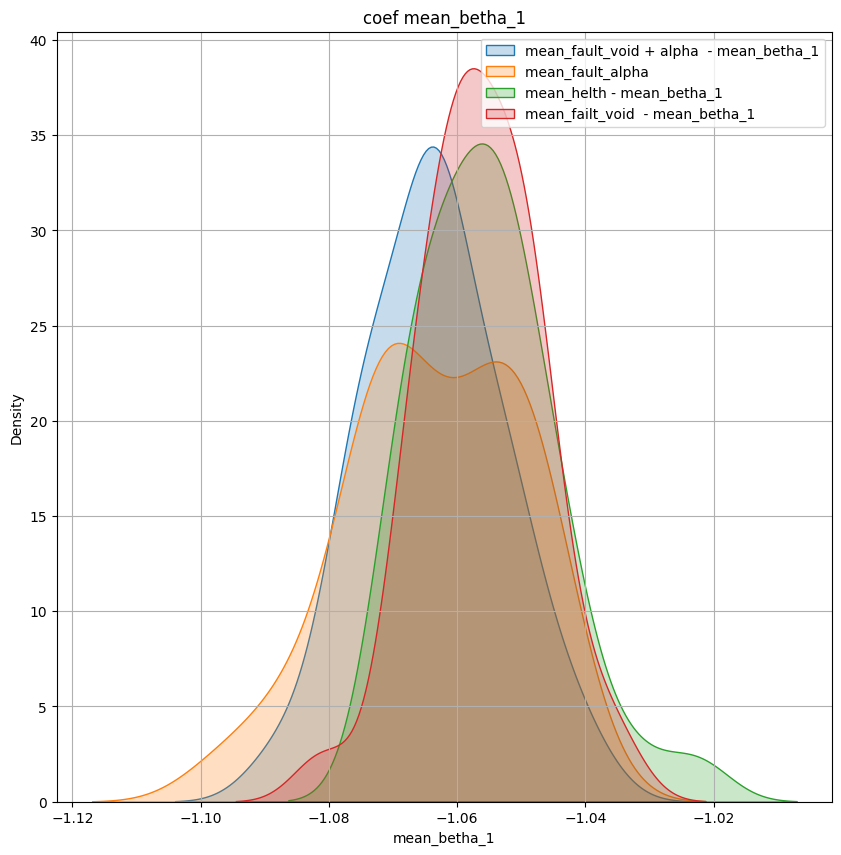

mean fault t :  -0.07183921995599656  - mean fault :  -0.0729470802799453  - mean health :  -0.06933426472331158


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

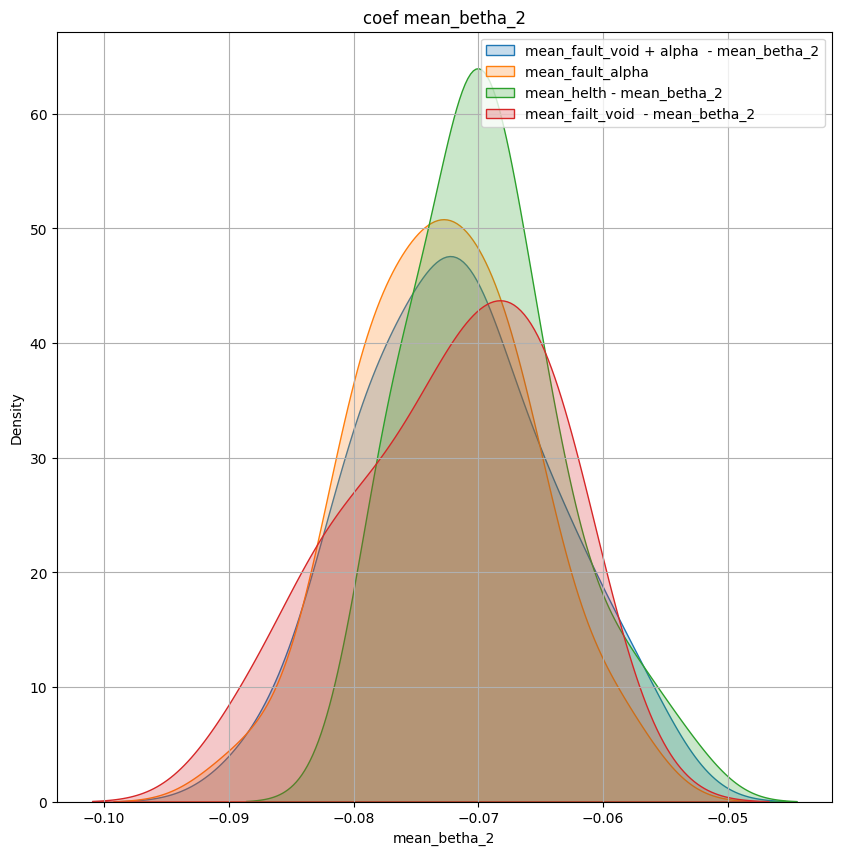

mean fault t :  2.8101821862802256  - mean fault :  2.810647827984106  - mean health :  2.790561416676732


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

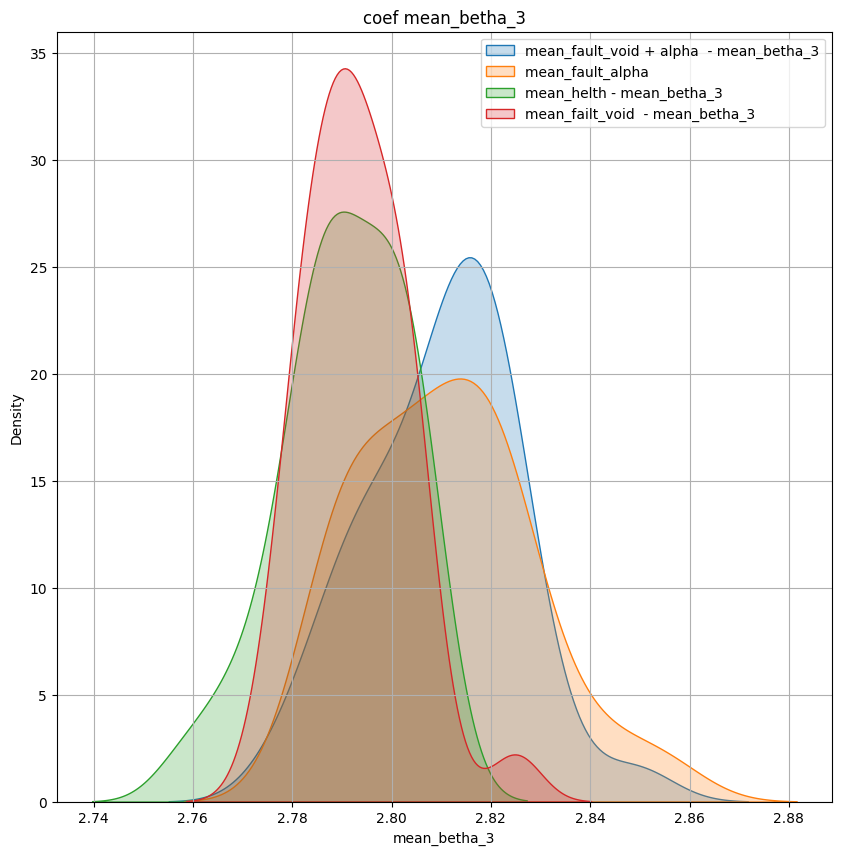

mean fault t :  0.08659007177264319  - mean fault :  0.0883566993781586  - mean health :  0.0857287580251263


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

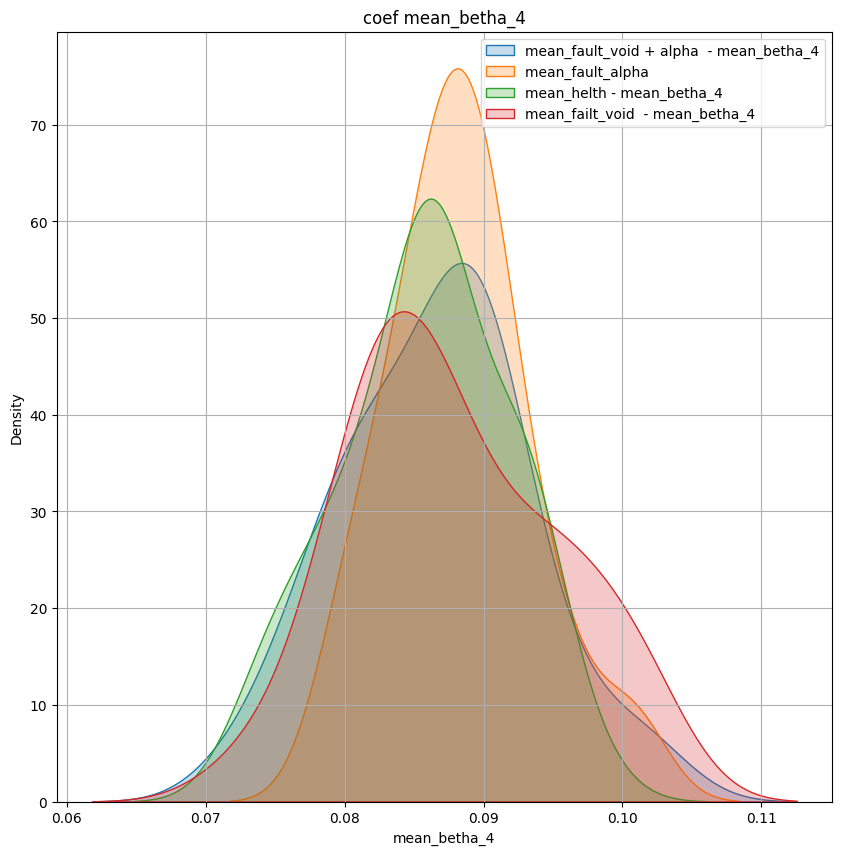

mean fault t :  -0.014435474589736402  - mean fault :  -0.01434019517501764  - mean health :  -0.012790960236695332


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

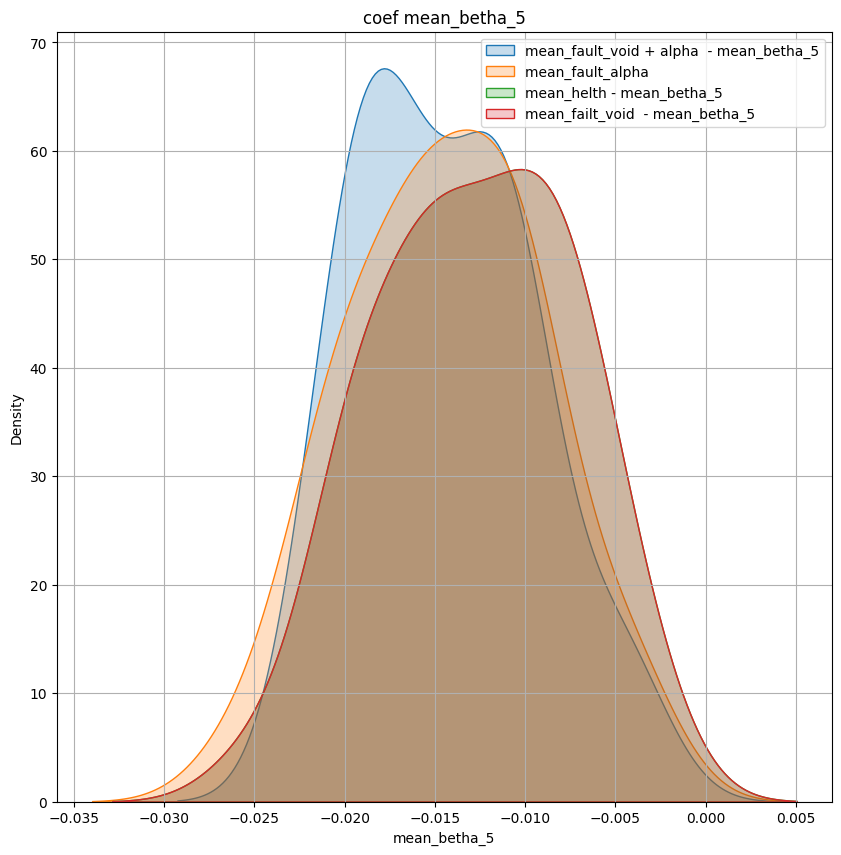

In [ ]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [ ]:
# df_result = pd.DataFrame(total_simulation)


In [ ]:
df_result.columns

Index(['bias_correlation', 'betha_0_correlation', 'betha_1_correlation',
       'betha_2_correlation', 'betha_3_correlation', 'betha_4_correlation',
       'betha_5_correlation', 'alpha', 'flap', 'accuracy_nav',
       'accuracy_random_forest', 'n_estimators_RF', 'max_features_RF',
       'max_depth_RF', 'criterion_RF', 'accuracy_extra_classifier',
       'accuracy_svc_', 'C_svc', 'kernel_svc', 'gamma_svc', 'ann'],
      dtype='object')

In [ ]:
df_result.head(5)

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,...,n_estimators_RF,max_features_RF,max_depth_RF,criterion_RF,accuracy_extra_classifier,accuracy_svc_,C_svc,kernel_svc,gamma_svc,ann
0,0.005823,NaN,0.001001,0.003920,0.005154,0.006791,0.014571,0.001,1,0.227273,...,200,sqrt,8,entropy,0.313131,0.318182,100,rbf,0.1,0.366162
1,0.005453,NaN,-0.001781,0.025367,0.007664,-0.014624,0.031132,0.001,2,0.222222,...,200,sqrt,4,gini,0.292929,0.343434,1000,rbf,0.1,0.431818
2,0.007594,NaN,0.019759,0.033610,-0.014438,-0.029723,0.031067,0.001,3,0.260101,...,200,sqrt,5,gini,0.262626,0.351010,100,rbf,0.1,0.373737
3,0.005758,NaN,0.005867,-0.043981,0.004558,0.017767,-0.040836,0.001,4,0.262626,...,200,sqrt,7,gini,0.308081,0.343434,100,rbf,0.1,0.388889
4,0.010872,NaN,0.016624,0.012214,-0.009678,-0.036455,-0.013340,0.002,1,0.222222,...,200,sqrt,8,gini,0.287879,0.330808,100,rbf,0.1,0.378788


In [ ]:
df_svc_group = df_result.groupby(['alpha' , 'flap' ]).agg({'accuracy_svc_' : ['max'] , 'accuracy_nav':['max'] , 'accuracy_extra_classifier' : ['max'] , 'ann':['max']})

In [ ]:
df_svc_group

accuracy_svc_ accuracy_nav accuracy_extra_classifier       ann
                     max          max                       max       max
alpha flap                                                               
0.001 1         0.318182     0.227273                  0.313131  0.366162
      2         0.343434     0.222222                  0.292929  0.431818
      3         0.351010     0.260101                  0.262626  0.373737
      4         0.343434     0.262626                  0.308081  0.388889
0.002 1         0.330808     0.222222                  0.287879  0.378788
      2         0.328283     0.229798                  0.318182  0.358586
      3         0.310606     0.222222                  0.262626  0.421717
      4         0.335859     0.250000                  0.282828  0.419192
0.003 1         0.366162     0.229798                  0.325758  0.388889
      2         0.351010     0.209596                  0.320707  0.373737
      3         0.351010     0.252525                  0.305556  0.381313
      4         0.363636     0.239899                  0.282828  0.297980
0.004 1         0.358586     0.237374                  0.300505  0.409091
      2         0.320707     0.222222                  0.328283  0.368687
      3         0.340909     0.280303                  0.282828  0.457071
      4         0.328283     0.227273                  0.295455  0.434343
0.005 1         0.318182     0.262626                  0.282828  0.429293
      2         0.348485     0.255051                  0.257576  0.351010
      3         0.335859     0.217172                  0.308081  0.340909
      4         0.323232     0.229798                  0.290404  0.391414
0.006 1         0.345960     0.239899                  0.295455  0.356061
      2         0.338384     0.232323                  0.310606  0.356061
      3         0.363636     0.217172                  0.280303  0.398990
      4         0.363636     0.242424                  0.303030  0.441919
0.007 1         0.333333     0.237374                  0.313131  0.454545
      2         0.315657     0.237374                  0.280303  0.305556
      3         0.345960     0.217172                  0.315657  0.356061
      4         0.338384     0.252525                  0.310606  0.419192
0.008 1         0.333333     0.272727                  0.300505  0.378788
      2         0.396465     0.262626                  0.305556  0.315657
      3         0.348485     0.250000                  0.277778  0.449495
      4         0.358586     0.255051                  0.290404  0.414141
0.009 1         0.348485     0.219697                  0.323232  0.444444
      2         0.371212     0.250000                  0.320707  0.416667
      3         0.398990     0.260101                  0.340909  0.469697
      4         0.371212     0.247475                  0.315657  0.441919

In [ ]:
df_svc_group.plot(x = 'alpha' , y = 'accuracy_svc_mean')

KeyError: 'alpha'

InvalidIndexError: (slice(None, None, None), 3)

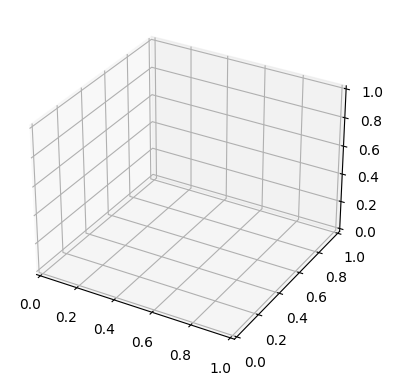

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_svc_group.iloc[: , 0 ] , df_svc_group.iloc[: , 1 ] , df_svc_group[: , 3])
plt.legend()
plt.grid()
plt.show()

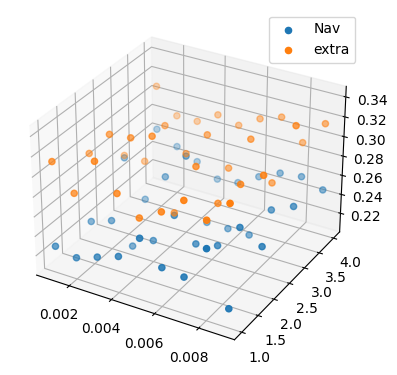

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 9] , label='Nav')
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 15] , label='extra')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_result.head()

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,...,n_estimators_RF,max_features_RF,max_depth_RF,criterion_RF,accuracy_extra_classifier,accuracy_svc_,C_svc,kernel_svc,gamma_svc,ann
0,0.005823,NaN,0.001001,0.003920,0.005154,0.006791,0.014571,0.001,1,0.227273,...,200,sqrt,8,entropy,0.313131,0.318182,100,rbf,0.1,0.366162
1,0.005453,NaN,-0.001781,0.025367,0.007664,-0.014624,0.031132,0.001,2,0.222222,...,200,sqrt,4,gini,0.292929,0.343434,1000,rbf,0.1,0.431818
2,0.007594,NaN,0.019759,0.033610,-0.014438,-0.029723,0.031067,0.001,3,0.260101,...,200,sqrt,5,gini,0.262626,0.351010,100,rbf,0.1,0.373737
3,0.005758,NaN,0.005867,-0.043981,0.004558,0.017767,-0.040836,0.001,4,0.262626,...,200,sqrt,7,gini,0.308081,0.343434,100,rbf,0.1,0.388889
4,0.010872,NaN,0.016624,0.012214,-0.009678,-0.036455,-0.013340,0.002,1,0.222222,...,200,sqrt,8,gini,0.287879,0.330808,100,rbf,0.1,0.378788


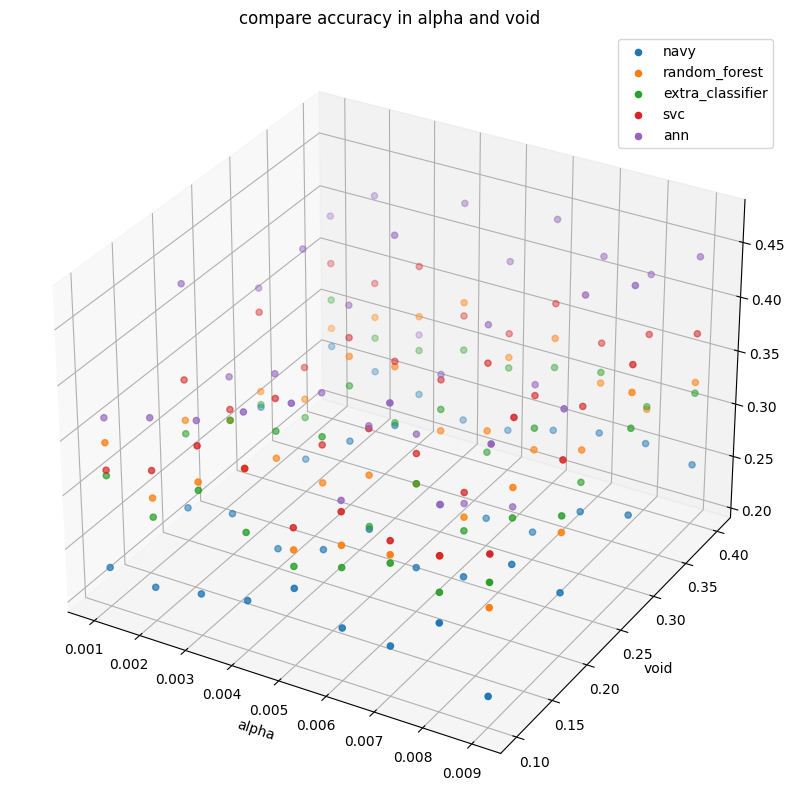

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( projection='3d' )
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 9 ] , label = 'navy')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in alpha and void  ")
plt.xlabel("alpha")
plt.ylabel("void")
plt.legend()
plt.grid()
plt.show()

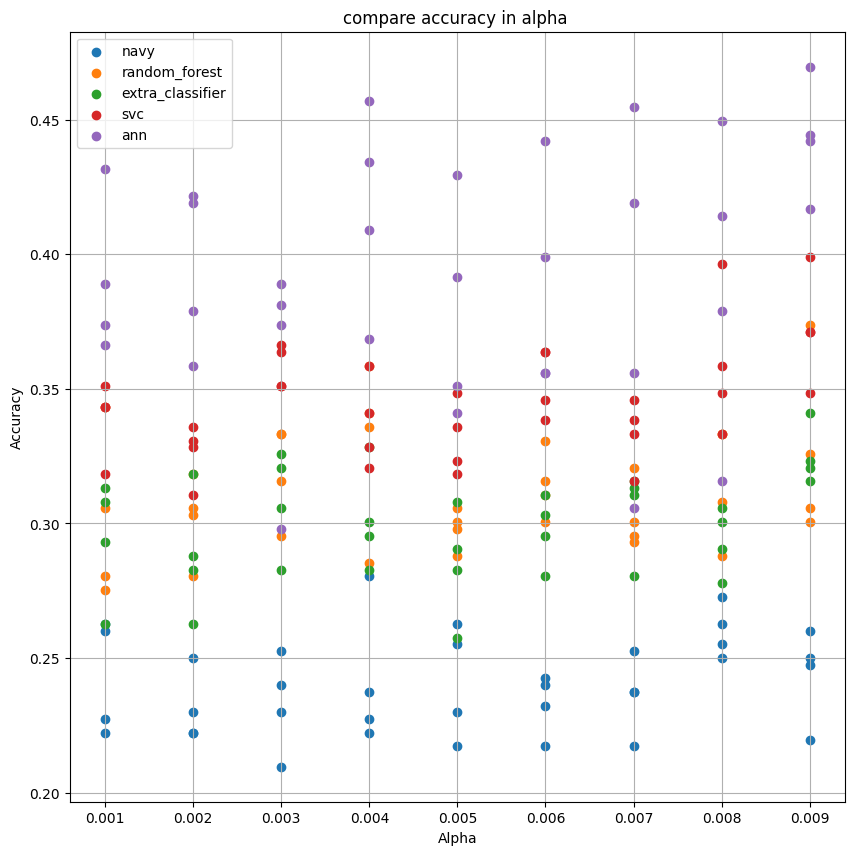

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( )
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 9 ] , label = 'navy')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in alpha ")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

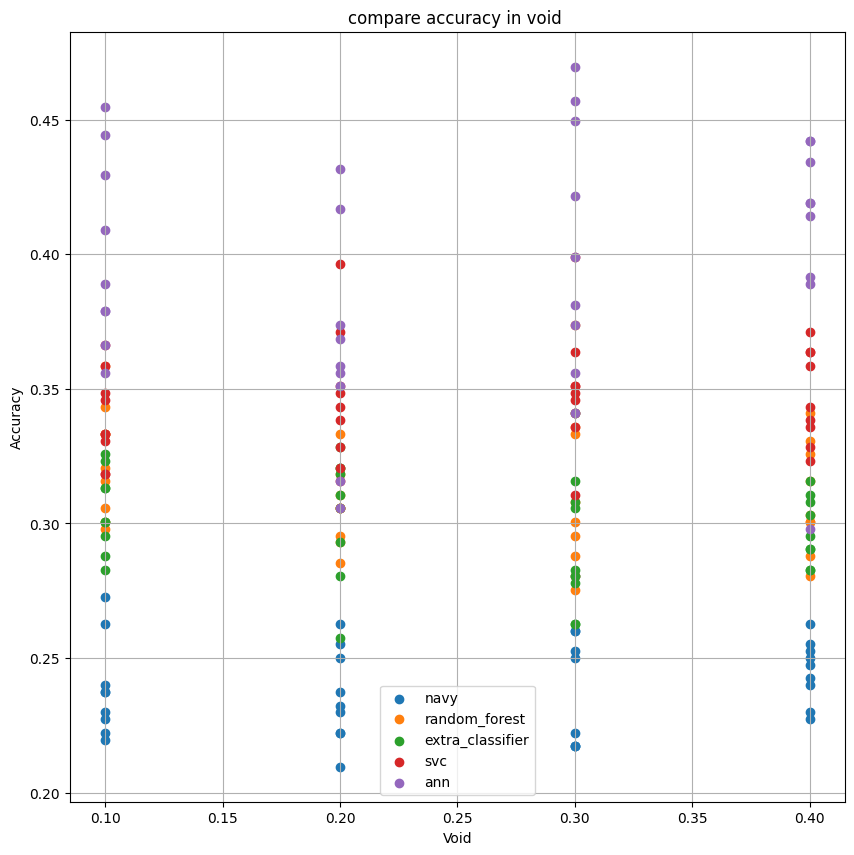

In [ ]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( )
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 9 ] , label = 'navy')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in void ")
plt.ylabel("Accuracy")
plt.xlabel("Void")
plt.legend()
plt.grid()
plt.show()

In [ ]:
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[: , -1 ] , label = 'ann')

In [ ]:
filtering = []
for element in ['accuracy_nav' , 'accuracy_extra_classifier' , 'accuracy_svc_' , 'ann' ] :
  for alpha in range(35 , 100 ) :
    df_filter = df_result[  df_result[f'{element}'] > alpha/ 100  ]
    if len(df_filter )> 1 :
      filtering.append([element , df_filter ])
      print(f"alpha : {alpha}")





alpha : 35
alpha : 36
alpha : 37
alpha : 38
alpha : 39
alpha : 35
alpha : 36
alpha : 37
alpha : 38
alpha : 39
alpha : 40
alpha : 41
alpha : 42
alpha : 43
alpha : 44
alpha : 45


In [ ]:
pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )

In [ ]:
df_health_mean_and_std

,mean_bias,std_bias,mean_betha_0,std_betha_0,mean_betha_1,std_betha_1,mean_betha_2,std_betha_2,mean_betha_3,std_betha_3,mean_betha_4,std_betha_4,mean_betha_5,std_betha_5
0,1.745096,0.260044,0.0,0.0,-1.056804,0.209541,-0.073644,0.129760,2.792884,0.254739,0.085743,0.109086,-0.017966,0.096926
1,1.743771,0.259850,0.0,0.0,-1.052916,0.209514,-0.070774,0.128498,2.786919,0.242870,0.087968,0.110616,-0.013064,0.093294
2,1.744674,0.260548,0.0,0.0,-1.064317,0.228728,-0.075731,0.127595,2.803297,0.273284,0.093156,0.109736,-0.014796,0.094638
3,1.745513,0.263405,0.0,0.0,-1.051934,0.222952,-0.065644,0.126159,2.788059,0.268972,0.086049,0.103873,-0.007780,0.093741
4,1.745718,0.261954,0.0,0.0,-1.066218,0.213009,-0.077022,0.122878,2.806160,0.243853,0.092807,0.111928,-0.014708,0.091254
5,1.745354,0.259632,0.0,0.0,-1.040883,0.220720,-0.053424,0.116957,2.769159,0.231894,0.075753,0.104389,-0.003873,0.090218
6,1.745758,0.261151,0.0,0.0,-1.060306,0.218404,-0.076965,0.119729,2.797138,0.265604,0.086147,0.099485,-0.019509,0.090486
7,1.743547,0.261929,0.0,0.0,-1.044999,0.198916,-0.062144,0.124853,2.774780,0.232874,0.076620,0.106223,-0.011214,0.097853
8,1.744652,0.260282,0.0,0.0,-1.057789,0.228974,-0.060869,0.123678,2.793185,0.257332,0.086512,0.106891,-0.002895,0.090060
9,1.744652,0.259202,0.0,0.0,-1.049872,0.213846,-0.070179,0.116421,2.783019,0.246992,0.085936,0.100563,-0.013730,0.086973


In [ ]:
check_columns

['mean_bias',
 'mean_betha_0',
 'mean_betha_1',
 'mean_betha_2',
 'mean_betha_3',
 'mean_betha_4',
 'mean_betha_5']

In [ ]:
df_health_mean_and_std

,mean_bias,std_bias,mean_betha_0,std_betha_0,mean_betha_1,std_betha_1,mean_betha_2,std_betha_2,mean_betha_3,std_betha_3,mean_betha_4,std_betha_4,mean_betha_5,std_betha_5
0,1.745096,0.260044,0.0,0.0,-1.056804,0.209541,-0.073644,0.129760,2.792884,0.254739,0.085743,0.109086,-0.017966,0.096926
1,1.743771,0.259850,0.0,0.0,-1.052916,0.209514,-0.070774,0.128498,2.786919,0.242870,0.087968,0.110616,-0.013064,0.093294
2,1.744674,0.260548,0.0,0.0,-1.064317,0.228728,-0.075731,0.127595,2.803297,0.273284,0.093156,0.109736,-0.014796,0.094638
3,1.745513,0.263405,0.0,0.0,-1.051934,0.222952,-0.065644,0.126159,2.788059,0.268972,0.086049,0.103873,-0.007780,0.093741
4,1.745718,0.261954,0.0,0.0,-1.066218,0.213009,-0.077022,0.122878,2.806160,0.243853,0.092807,0.111928,-0.014708,0.091254
5,1.745354,0.259632,0.0,0.0,-1.040883,0.220720,-0.053424,0.116957,2.769159,0.231894,0.075753,0.104389,-0.003873,0.090218
6,1.745758,0.261151,0.0,0.0,-1.060306,0.218404,-0.076965,0.119729,2.797138,0.265604,0.086147,0.099485,-0.019509,0.090486
7,1.743547,0.261929,0.0,0.0,-1.044999,0.198916,-0.062144,0.124853,2.774780,0.232874,0.076620,0.106223,-0.011214,0.097853
8,1.744652,0.260282,0.0,0.0,-1.057789,0.228974,-0.060869,0.123678,2.793185,0.257332,0.086512,0.106891,-0.002895,0.090060
9,1.744652,0.259202,0.0,0.0,-1.049872,0.213846,-0.070179,0.116421,2.783019,0.246992,0.085936,0.100563,-0.013730,0.086973


{'norm': {'loc': -0.06933426472331158, 'scale': 0.006011588681168787}}

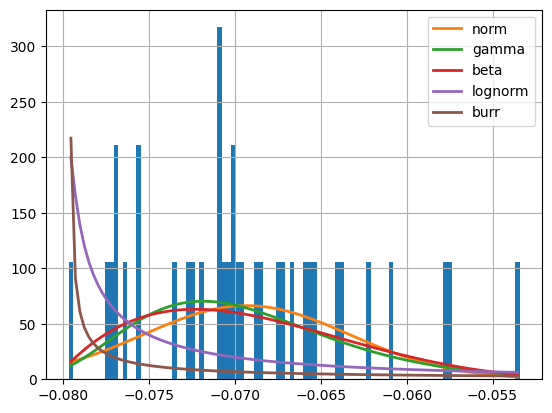

In [ ]:
# for element in check_columns :
#   for df in [df_fault_t_mean_and_std , df_fault_mean_and_std , df_health_mean_and_std  , df_health_t_mean_and_std ] :
# [df_fault_t_mean_and_std , df_health_mean_and_std , df_fault_mean_and_std ,df_health_t_mean_and_std ]

f = Fitter( df_health_mean_and_std['mean_betha_2'] ,
              distributions=['gamma',
                            'lognorm',
                            "beta",
                            "burr",
                            "norm" ])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [ ]:
for j in range(len(filtering)) :
  print(filtering[j][0])
  df_filtered = filtering[0][1]

In [ ]:
len(filtering)

0

In [ ]:
filtering[0]

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,...,n_estimators_RF,max_features_RF,max_depth_RF,criterion_RF,accuracy_extra_classifier,accuracy_svc_,C_svc,kernel_svc,gamma_svc,ann
0,0.005823,NaN,0.001001,0.003920,0.005154,0.006791,0.014571,0.001,1,0.227273,...,200,sqrt,8,entropy,0.313131,0.318182,100,rbf,0.1,0.366162
1,0.005453,NaN,-0.001781,0.025367,0.007664,-0.014624,0.031132,0.001,2,0.222222,...,200,sqrt,4,gini,0.292929,0.343434,1000,rbf,0.1,0.431818
2,0.007594,NaN,0.019759,0.033610,-0.014438,-0.029723,0.031067,0.001,3,0.260101,...,200,sqrt,5,gini,0.262626,0.351010,100,rbf,0.1,0.373737
3,0.005758,NaN,0.005867,-0.043981,0.004558,0.017767,-0.040836,0.001,4,0.262626,...,200,sqrt,7,gini,0.308081,0.343434,100,rbf,0.1,0.388889
4,0.010872,NaN,0.016624,0.012214,-0.009678,-0.036455,-0.013340,0.002,1,0.222222,...,200,sqrt,8,gini,0.287879,0.330808,100,rbf,0.1,0.378788
5,0.012011,NaN,-0.038916,-0.022176,0.054645,0.004647,-0.038265,0.002,2,0.229798,...,500,sqrt,8,entropy,0.318182,0.328283,100,rbf,0.1,0.358586
6,0.008474,NaN,0.030581,0.026068,-0.020897,-0.007932,0.040088,0.002,3,0.222222,...,500,sqrt,8,entropy,0.262626,0.310606,1000,rbf,0.1,0.421717
7,0.013813,NaN,-0.017359,-0.014591,0.033190,0.019780,-0.011853,0.002,4,0.250000,...,200,sqrt,7,entropy,0.282828,0.335859,1000,rbf,0.1,0.419192
8,0.014761,NaN,0.006313,0.014341,0.006112,-0.021216,-0.018777,0.003,1,0.229798,...,200,sqrt,8,gini,0.325758,0.366162,1000,rbf,0.1,0.388889
9,0.013405,NaN,-0.018928,0.023174,0.027190,-0.039146,0.008215,0.003,2,0.209596,...,500,sqrt,7,entropy,0.320707,0.351010,1000,rbf,0.1,0.373737


In [ ]:
df_result.groupby("alpha" , "flap").agg({'navy':[]})

ValueError: No axis named flap for object type DataFrame

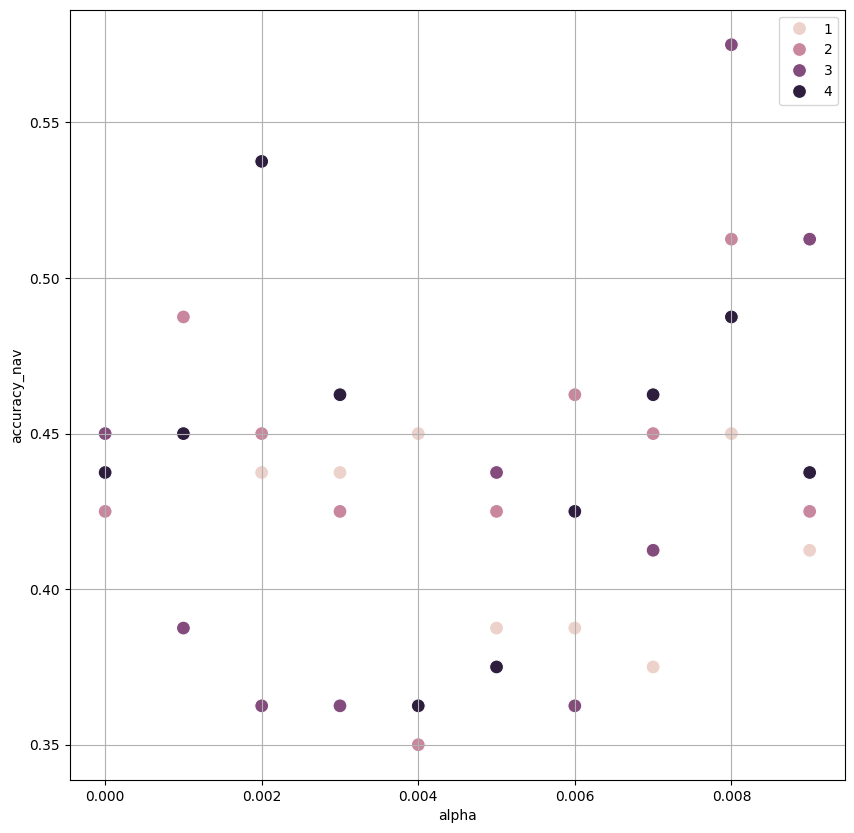

In [ ]:
plt.figure(figsize = (10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="accuracy_nav", hue="flap" , s = 100  )
plt.legend()
plt.grid()
plt.show()

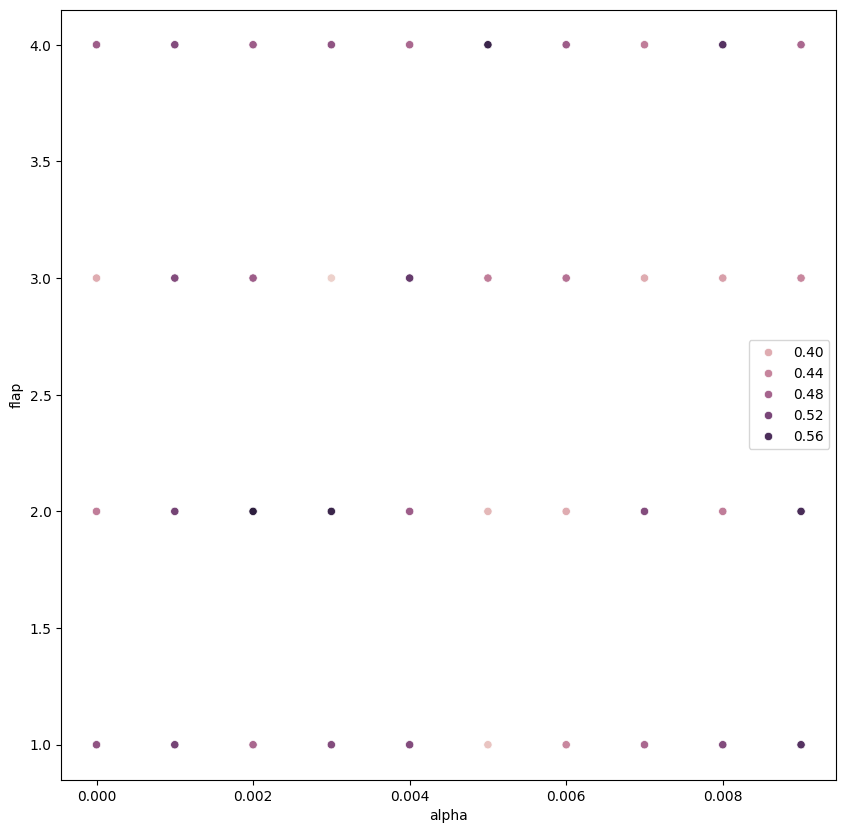

In [ ]:
plt.figure(figsize=(10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="flap", hue="accuracy_svc_", hue_order = ["linear" , "rbf" ] )
plt.legend()
plt.show()

In [ ]:
df_result['flap'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

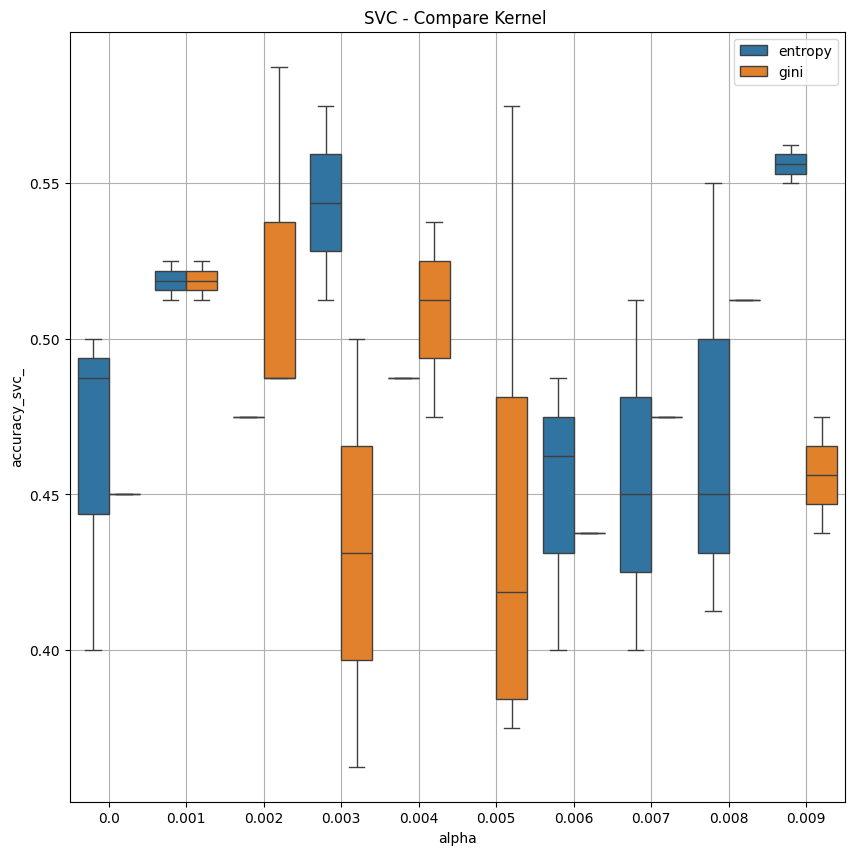

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='criterion_RF', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

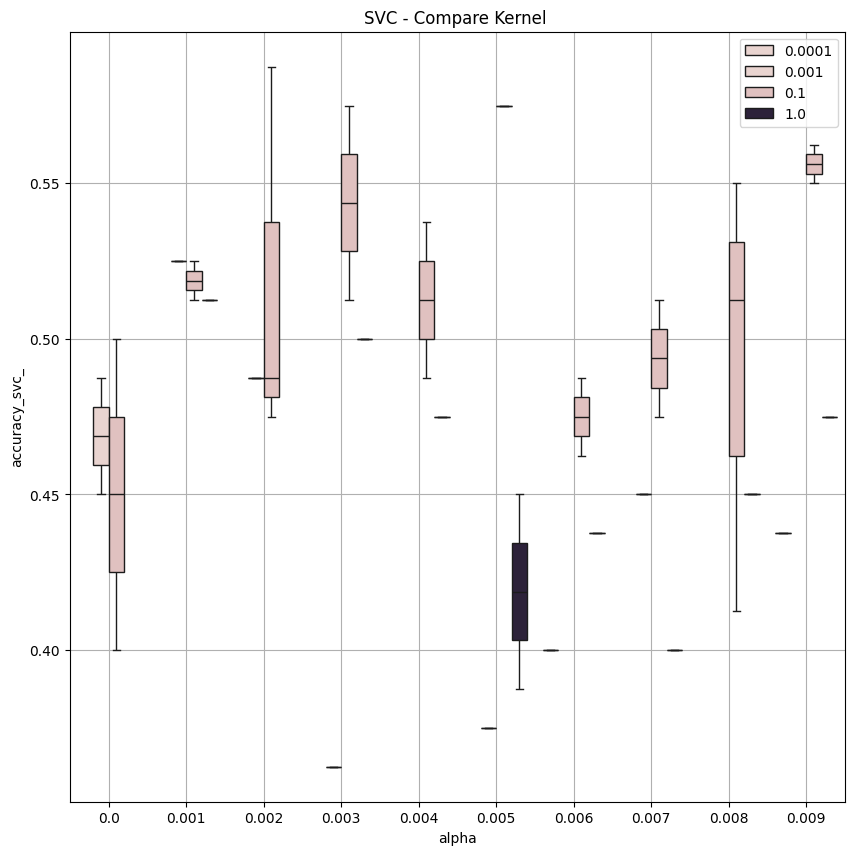

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='gamma_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

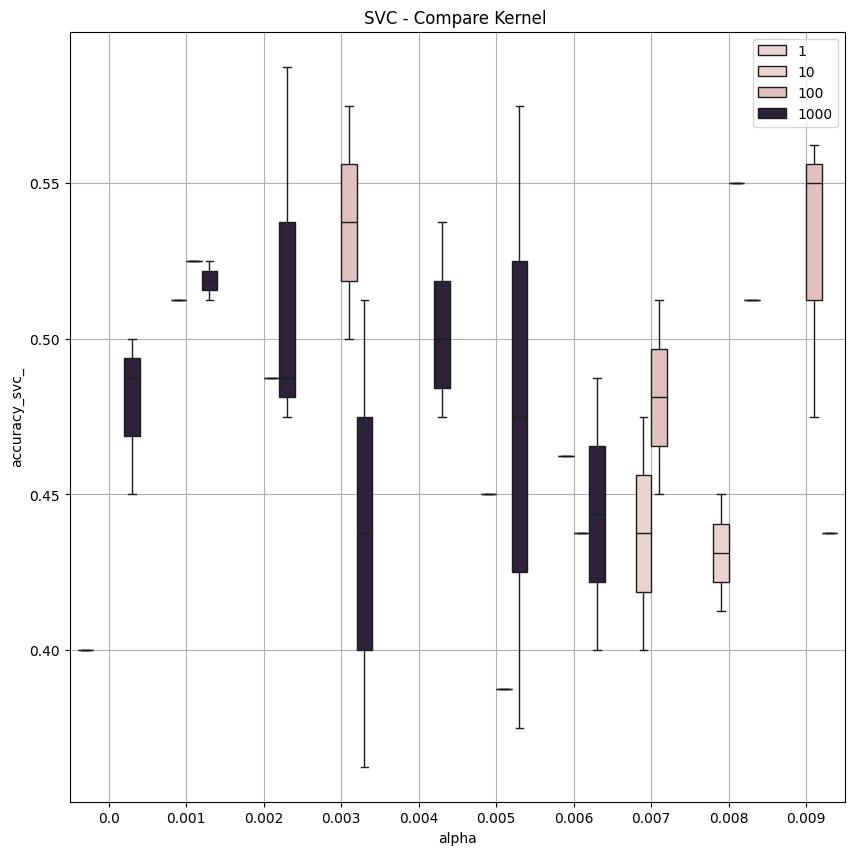

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='C_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


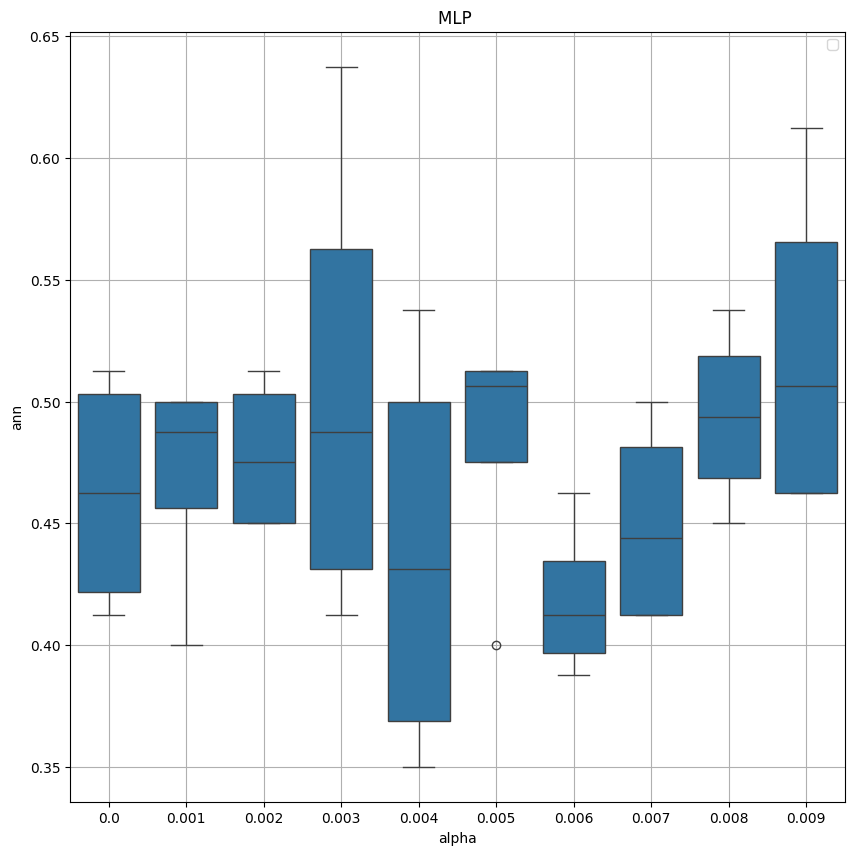

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="ann" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
accuracy_nav

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_nav" , hue="flap" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
